# Data Overview

dataset from kaggle: https://www.kaggle.com/datasets/undersc0re/predict-the-churn-risk-rate/data

| Column name | Description |
|-------------|-------------|
| customer_id | Represents the unique identification number of a customer |
| Name | Represents the name of a customer |
| age | Represents the age of a customer |
| security_no | Represents a unique security number that is used to identify a person |
| region_category | Represents the region that a customer belongs to |
| membership_category | Represents the category of the membership that a customer is using |
| joining_date | Represents the date when a customer became a member |
| joined_through referral | Represents whether a customer joined using any referral code or ID |
| referral_id | Represents a referral ID |
| preferred_offer types | Represents the type of offer that a customer prefers |
| medium_of operation | Represents the medium of operation that a customer uses for transactions |
| internet_option | Represents the type of internet service a customer uses |
| last_visit time | Represents the last time a customer visited the website |
| days_since last login | Represents the no. of days since a customer last logged into the website |
| avg_time spent | Represents the average time spent by a customer on the website |
| avg_transaction value | Represents the average transaction value of a customer |
| avg_frequency login days | Represents the no. of times a customer has logged in to the website |
| points_in wallet | Represents the points awarded to a customer on each transaction |
| used_special discount | Represents whether a customer uses special discounts offered |
| offer_application preference | Represents whether a customer prefers offers |
| past_complaint | Represents whether a customer has raised any complaints |
| complaint_status | Represents whether the complaints raised by a customer was resolved |
| feedback | Represents the feedback provided by a customer |
| churn_risk score | Represents the churn risk score that 0 or 1 |


#Needed Installs

In [ ]:
!pip install prince

In [ ]:
!pip uninstall numpy -y
!pip install catboost

Found existing installation: numpy 1.25.0
Uninstalling numpy-1.25.0:
  Successfully uninstalled numpy-1.25.0
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.


In [ ]:
!pip install numpy==1.25.0 --force-reinstall
!pip install scipy

  Using cached numpy-1.25.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.25.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.25.0 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.0 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.25.0 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.25.0 which is incompatible.


ERROR: Operation cancelled by user
^C


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 10.1 MB/s eta 0:00:00


#Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
from itertools import combinations
from scipy.stats import chi2_contingency

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from prince import MCA

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform, randint

import joblib
import optuna
import optuna.visualization as vis

import shap

# Data Analysis

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/churn.csv")

In [ ]:
df.shape

(36992, 24)

In [ ]:
df.head()

Unnamed: 0  age gender security_no region_category  membership_category  \
0           0   18      F     XW0DQ7H         Village  Platinum Membership   
1           1   32      F     5K0N3X1            City   Premium Membership   
2           2   44      F     1F2TCL3            Town        No Membership   
3           3   37      M     VJGJ33N            City        No Membership   
4           4   31      F     SVZXCWB            City        No Membership   

  joining_date joined_through_referral referral_id     preferred_offer_types  \
0   2017-08-17                      No    xxxxxxxx     Gift Vouchers/Coupons   
1   2017-08-28                       ?    CID21329     Gift Vouchers/Coupons   
2   2016-11-11                     Yes    CID12313     Gift Vouchers/Coupons   
3   2016-10-29                     Yes     CID3793     Gift Vouchers/Coupons   
4   2017-09-12                      No    xxxxxxxx  Credit/Debit Card Offers   

  medium_of_operation internet_option last_visit_time  days_since_last_login  \
0                   ?           Wi-Fi        16:08:02                     17   
1             Desktop     Mobile_Data        12:38:13                     16   
2             Desktop           Wi-Fi        22:53:21                     14   
3             Desktop     Mobile_Data        15:57:50                     11   
4          Smartphone     Mobile_Data        15:46:44                     20   

   avg_time_spent  avg_transaction_value avg_frequency_login_days  \
0          300.63               53005.25                     17.0   
1          306.34               12838.38                     10.0   
2          516.16               21027.00                     22.0   
3           53.27               25239.56                      6.0   
4          113.13               24483.66                     16.0   

   points_in_wallet used_special_discount offer_application_preference  \
0            781.75                   Yes                          Yes   
1               NaN                   Yes                           No   
2            500.69                    No                          Yes   
3            567.66                    No                          Yes   
4            663.06                    No                          Yes   

  past_complaint     complaint_status                  feedback  \
0             No       Not Applicable  Products always in Stock   
1            Yes               Solved     Quality Customer Care   
2            Yes  Solved in Follow-up              Poor Website   
3            Yes             Unsolved              Poor Website   
4            Yes               Solved              Poor Website   

   churn_risk_score  
0                 0  
1                 0  
2                 1  
3                 1  
4                 1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36992 non-null  int64  
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               31564 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joining_date                  36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36704 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  last_visit_time               36992 non-null  object 
 13  d

##Ydata Profiling

In [ ]:
 pip install -U ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 21.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b74bae44137d63cbc7498ebb3bb8679883b3327ac2bbd1e8474f9a6d4f0eb47f
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 24/24 [00:13<00:00,  1.77it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##Checking Duplicates

korelacja - usuniecie, polaczenie 2 zmiennych, 3 sposob - PCA, MCA 0.6>, 4- 1 model z jednych, 2 model z drugich, później ensemble

In [ ]:
df.duplicated().sum()

0

Checking nulls

In [ ]:
df.isna().sum()

Unnamed: 0                         0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [ ]:
df.describe()

Unnamed: 0           age  days_since_last_login  avg_time_spent  \
count  36992.000000  36992.000000           36992.000000    36992.000000   
mean   18495.500000     37.118161             -41.915576      243.472334   
std    10678.814916     15.867412             228.819900      398.289149   
min        0.000000     10.000000            -999.000000    -2814.109110   
25%     9247.750000     23.000000               8.000000       60.102500   
50%    18495.500000     37.000000              12.000000      161.765000   
75%    27743.250000     51.000000              16.000000      356.515000   
max    36991.000000     64.000000              26.000000     3235.578521   

       avg_transaction_value  points_in_wallet  churn_risk_score  
count           36992.000000      33549.000000      36992.000000  
mean            29271.194003        686.882199          0.540982  
std             19444.806226        194.063624          0.498324  
min               800.460000       -760.661236          0.000000  
25%             14177.540000        616.150000          0.000000  
50%             27554.485000        697.620000          1.000000  
75%             40855.110000        763.950000          1.000000  
max             99914.050000       2069.069761          1.000000

# Checking if full rows aren't empty

In [ ]:
df[df['points_in_wallet'].isnull() & df['region_category'].isnull() & df['preferred_offer_types'].isnull()]

Unnamed: 0  age gender security_no region_category  \
4529         4529   14      F     EVGCC2T             NaN   
4734         4734   41      M     BTP3YWE             NaN   
9001         9001   52      F     IJBBW5I             NaN   
9928         9928   56      M     PYCDN6B             NaN   
16079       16079   13      F     CTAXAYD             NaN   

       membership_category joining_date joined_through_referral referral_id  \
4529       Gold Membership   2017-02-23                     Yes    CID63743   
4734    Premium Membership   2015-04-07                       ?    CID37593   
9001      Basic Membership   2017-04-20                     Yes    CID36459   
9928     Silver Membership   2017-11-20                     Yes    CID39986   
16079  Platinum Membership   2015-07-06                       ?     CID4300   

      preferred_offer_types medium_of_operation internet_option  \
4529                    NaN                Both           Wi-Fi   
4734                    NaN                Both     Fiber_Optic   
9001                    NaN          Smartphone           Wi-Fi   
9928                    NaN                   ?     Fiber_Optic   
16079                   NaN          Smartphone           Wi-Fi   

      last_visit_time  days_since_last_login  avg_time_spent  \
4529         01:09:01                      4          600.32   
4734         11:06:42                     10          764.99   
9001         23:32:55                   -999           68.82   
9928         10:17:55                     17           82.85   
16079        13:38:49                     10          292.36   

       avg_transaction_value avg_frequency_login_days  points_in_wallet  \
4529                 8797.56                     11.0               NaN   
4734                23781.92                      6.0               NaN   
9001                28467.12                    Error               NaN   
9928                20770.22                     25.0               NaN   
16079               88600.97                      5.0               NaN   

      used_special_discount offer_application_preference past_complaint  \
4529                     No                          Yes             No   
4734                     No                          Yes            Yes   
9001                    Yes                           No             No   
9928                     No                          Yes             No   
16079                   Yes                           No             No   

          complaint_status               feedback  churn_risk_score  
4529        Not Applicable   Poor Product Quality                 0  
4734   Solved in Follow-up   Poor Product Quality                 0  
9001        Not Applicable  Poor Customer Service                 1  
9928        Not Applicable           Poor Website                 0  
16079       Not Applicable       Reasonable Price                 0

#Deleting unneeded data

In [ ]:
df.drop(columns=['Unnamed: 0', 'security_no', 'referral_id'], inplace=True)

Unnamed: 0 - 100% data unique  
Security_no -  unique security number  
Refferal_id - we don't need id, we have column 'joined_through referral' Represents whether a customer joined using any referral code or ID |

#Changing data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   region_category               31564 non-null  object 
 3   membership_category           36992 non-null  object 
 4   joining_date                  36992 non-null  object 
 5   joined_through_referral       36992 non-null  object 
 6   preferred_offer_types         36704 non-null  object 
 7   medium_of_operation           36992 non-null  object 
 8   internet_option               36992 non-null  object 
 9   last_visit_time               36992 non-null  object 
 10  days_since_last_login         36992 non-null  int64  
 11  avg_time_spent                36992 non-null  float64
 12  avg_transaction_value         36992 non-null  float64
 13  a

In [ ]:
df['joining_date'] = df['joining_date'].astype('datetime64[ns]')

In [ ]:
df['last_visit_time'] = df['last_visit_time'].astype('datetime64[ns]')

In [ ]:
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].replace("Error", 0).astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   age                           36992 non-null  int64         
 1   gender                        36992 non-null  object        
 2   region_category               31564 non-null  object        
 3   membership_category           36992 non-null  object        
 4   joining_date                  36992 non-null  datetime64[ns]
 5   joined_through_referral       36992 non-null  object        
 6   preferred_offer_types         36704 non-null  object        
 7   medium_of_operation           36992 non-null  object        
 8   internet_option               36992 non-null  object        
 9   last_visit_time               36992 non-null  datetime64[ns]
 10  days_since_last_login         36992 non-null  int64         
 11  avg_time_spent              

#Analysis categorical data

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['gender', 'region_category', 'membership_category',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback'],
      dtype='object')

In [ ]:
fig = plt.figure(figsize=(15, 18))
num_features = len(categorical_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

for i, feature in enumerate(categorical_features):
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    ax.set_title(feature)
    (df[feature].value_counts(normalize=True) * 100).plot.bar(ax=ax)

    counts = df[feature].value_counts(normalize=True) * 100
    bars = counts.plot.bar(ax=ax)

    ax.set_ylabel("%")
    ax.set_xlabel("")
    plt.xticks(rotation=45)

    for bar in bars.containers:
        ax.bar_label(bar, fmt="%.1f%%", fontsize=9, padding=3, label_type='center')

plt.subplots_adjust(hspace=0.9, wspace=0.3)
plt.show()

In [ ]:
round(df['feedback'].value_counts()/len(df['feedback']) * 100,2).astype('str') + '%'

feedback
Poor Product Quality        17.17%
No reason specified          17.0%
Too many ads                16.97%
Poor Website                16.95%
Poor Customer Service        16.9%
Reasonable Price             3.83%
User Friendly Website        3.76%
Products always in Stock     3.74%
Quality Customer Care        3.68%
Name: count, dtype: object

##Analysis numerical data

In [ ]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
numerical_features = numerical_features.drop('churn_risk_score')
numerical_features

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet'],
      dtype='object')

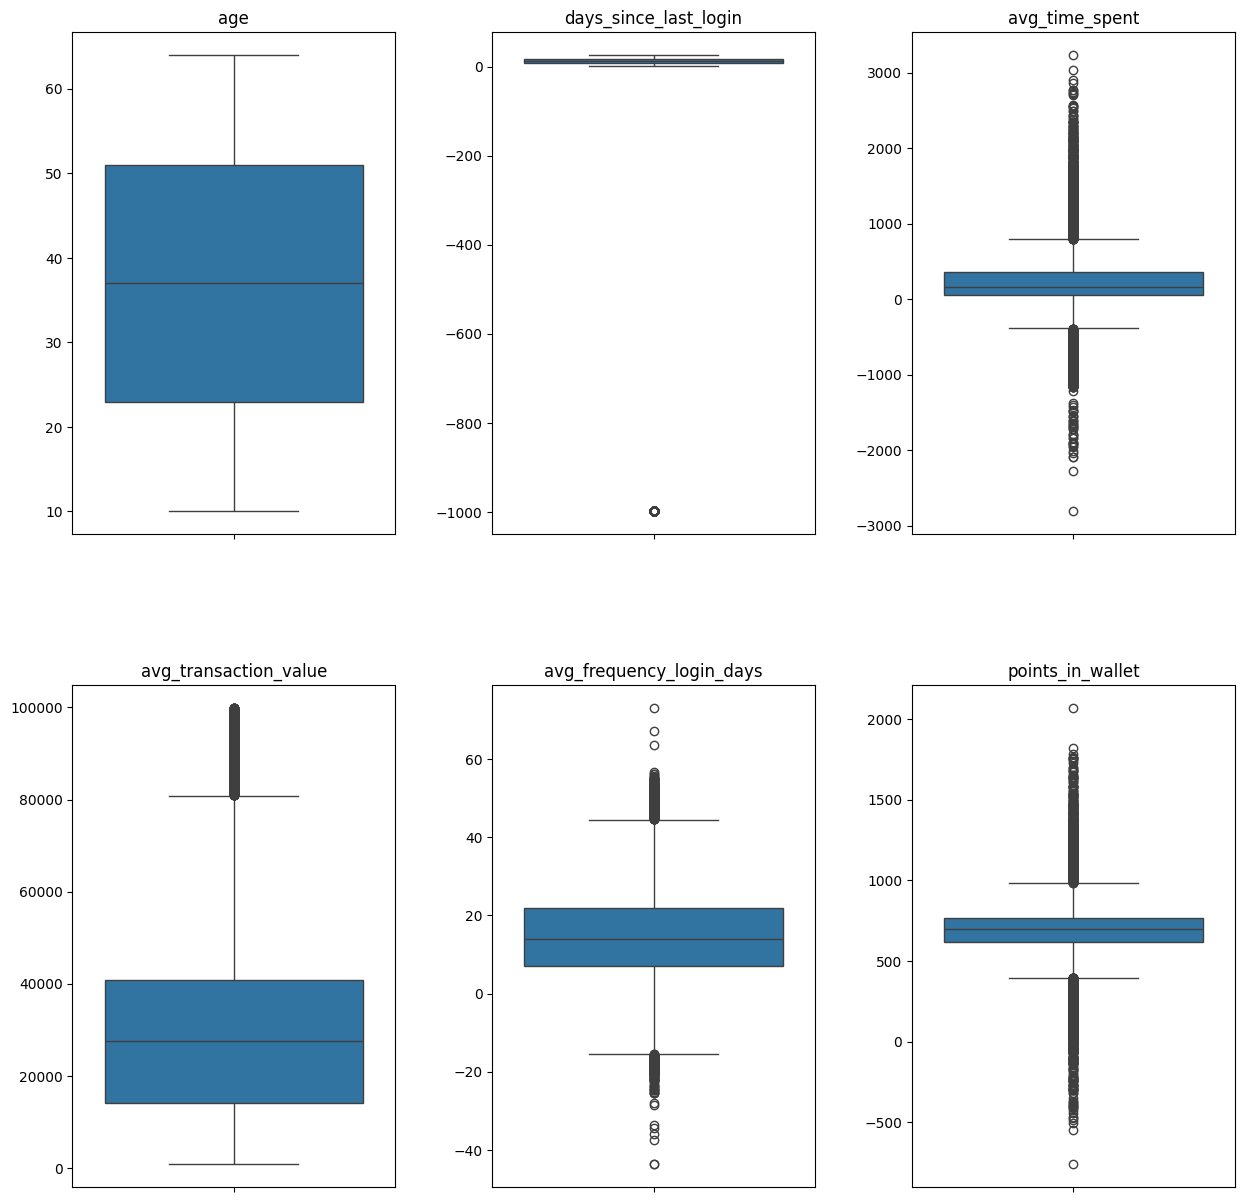

In [ ]:
def plot_boxplots(df=df, numerical_features=numerical_features):
  fig = plt.figure(figsize=(15, 15))
  num_features = len(numerical_features)
  num_cols = 3
  num_rows = (num_features + num_cols - 1) // num_cols

  for i, feature in enumerate(numerical_features):
      ax = fig.add_subplot(num_rows, num_cols, i + 1)
      ax.set_title(feature)
      sns.boxplot(data=df[feature], ax=ax)

      ax.set_ylabel("")
      ax.set_xlabel("")
      plt.xticks(rotation=45)

  plt.subplots_adjust(hspace=0.3, wspace=0.3)
  plt.show()

plot_boxplots()

Columns like avg_frequency_login_days, points_in_the_wallet, avg_time_spent, days_since_last_login shoulnd't be negative

In [ ]:
not_negative_columns = ['avg_frequency_login_days', 'points_in_wallet', 'avg_time_spent', 'days_since_last_login']

for col in not_negative_columns:
    df.loc[df[col] < 0, col] = 0

In [ ]:
plot_boxplots()

ilosci binow - pierwiastek z ilosci obserwacji

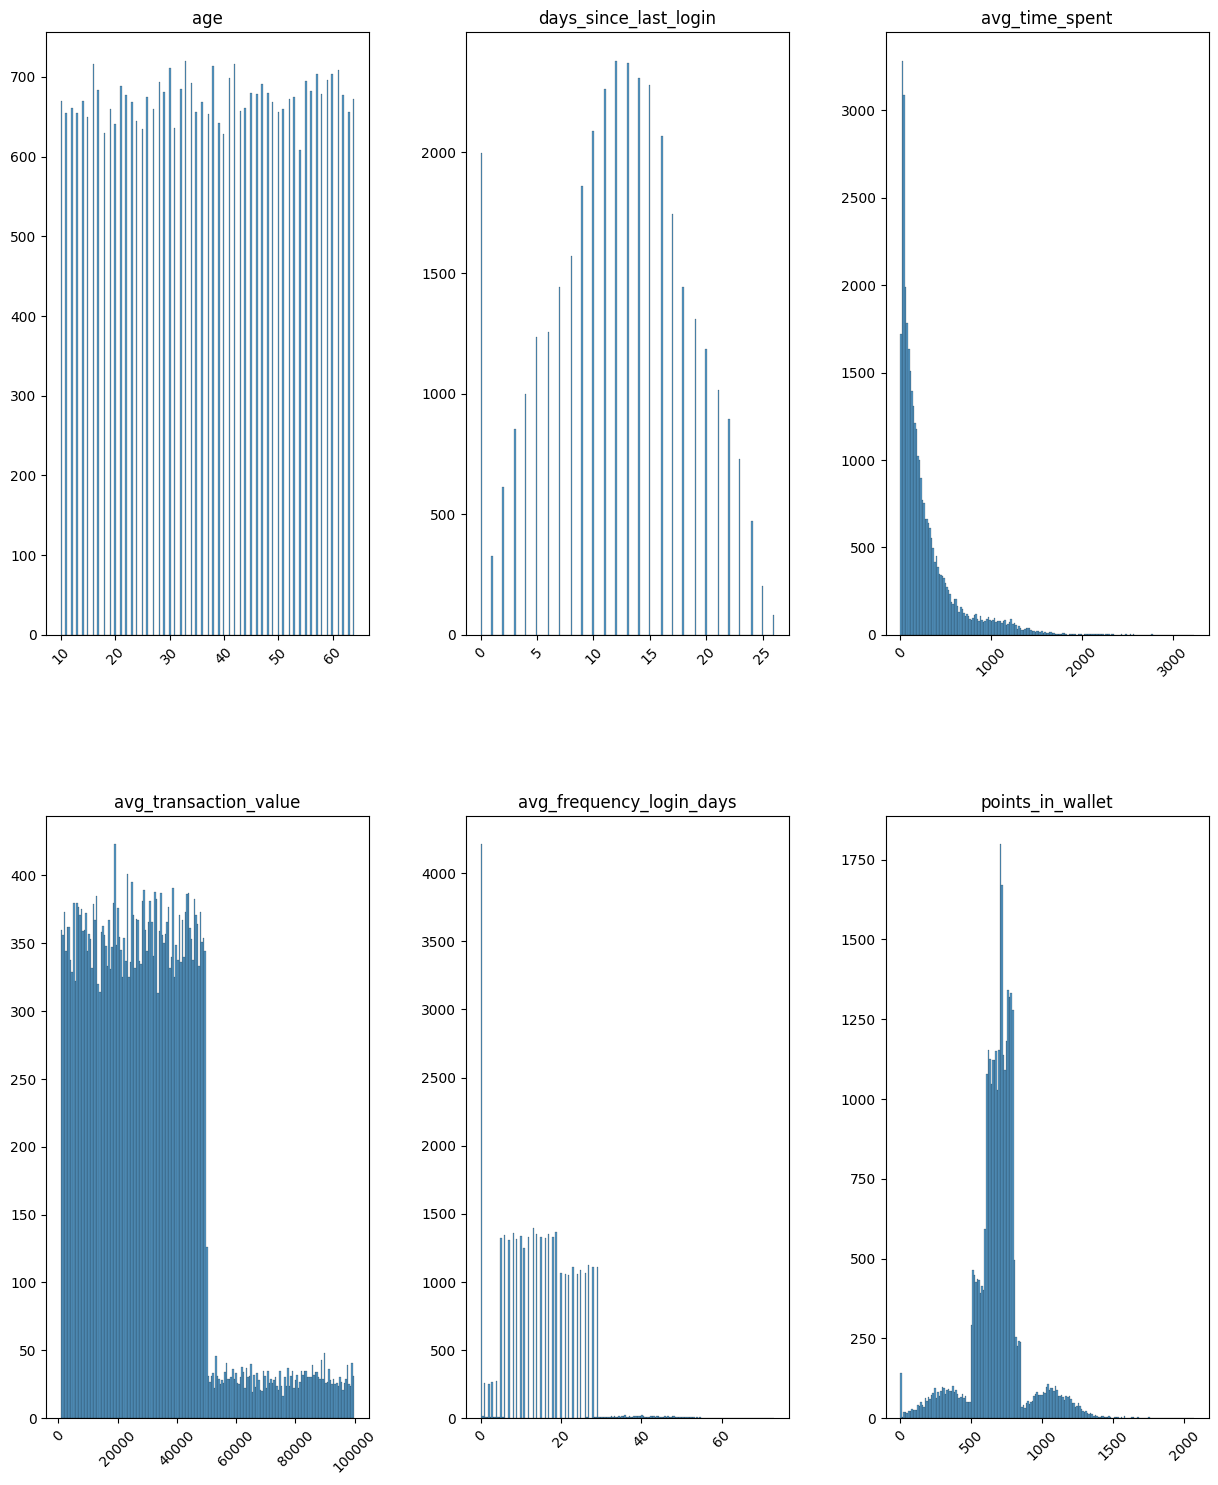

In [ ]:
fig = plt.figure(figsize=(15, 18))
num_features = len(numerical_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

for i, feature in enumerate(numerical_features):
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    ax.set_title(feature)
    sns.histplot(data=df[feature], ax=ax, bins=int(round(len(df[feature])**0.5, 0)))

    ax.set_ylabel("")
    ax.set_xlabel("")
    plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

#Manage nulls

In [ ]:
round(df.isna().sum() / len(df) * 100, 2).astype('str') + '%'

age                               0.0%
gender                            0.0%
region_category                 14.67%
membership_category               0.0%
joining_date                      0.0%
joined_through_referral           0.0%
preferred_offer_types            0.78%
medium_of_operation               0.0%
internet_option                   0.0%
last_visit_time                   0.0%
days_since_last_login             0.0%
avg_time_spent                    0.0%
avg_transaction_value             0.0%
avg_frequency_login_days          0.0%
points_in_wallet                 9.31%
used_special_discount             0.0%
offer_application_preference      0.0%
past_complaint                    0.0%
complaint_status                  0.0%
feedback                          0.0%
churn_risk_score                  0.0%
dtype: object

Deleting nulls < 5% dataset

In [ ]:
df.dropna(subset=['preferred_offer_types'], inplace=True)

Inputing 'region_category' with 'Other'

In [ ]:
df.fillna({'region_category' : 'Other'}, inplace=True)

After checking distribution median would be okay to inpute

In [ ]:
df['points_in_wallet'] = df['points_in_wallet'].fillna(df['points_in_wallet'].median())

Changing the missing values in the other columns to Other, Unknown, etc., to keep the format consistent.

In [ ]:
df['gender'] = df['gender'].replace('Unknown', 'Other')
df['joined_through_referral'] = df['joined_through_referral'].replace('?', 'Other')
df['medium_of_operation'] = df['medium_of_operation'].replace('?', 'Other')

Ewentualnie model ktory bedzie przewidywal wartosci, i czy ta zmienna jak jest do predykowanej

# Overview of columns connected with date

In [ ]:
df[['last_visit_time','days_since_last_login']].head()

last_visit_time  days_since_last_login
0 2025-05-06 16:08:02                     17
1 2025-05-06 12:38:13                     16
2 2025-05-06 22:53:21                     14
3 2025-05-06 15:57:50                     11
4 2025-05-06 15:46:44                     20

last_visit time - Represents the last time a customer visited the website  
days_since last login - Represents the no. of days since a customer last logged into the website  


It's gives as same information, better for model is days_since_last_login

In [ ]:
df.drop(columns=['last_visit_time'], inplace=True)

In [ ]:
df['joining_date'].head()

0   2017-08-17
1   2017-08-28
2   2016-11-11
3   2016-10-29
4   2017-09-12
Name: joining_date, dtype: datetime64[ns]

Checking last date in Dataset

In [ ]:
df['joining_date'].max()

Timestamp('2017-12-31 00:00:00')

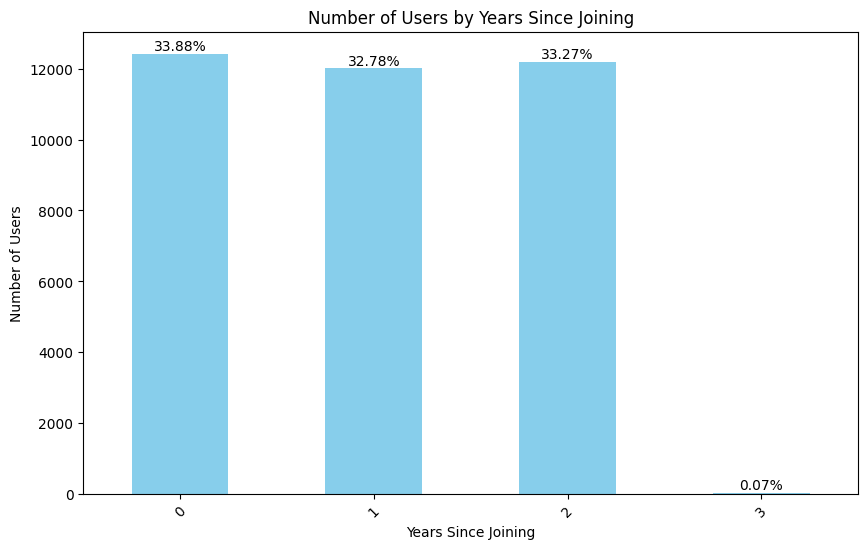

In [ ]:
last_date = pd.to_datetime("31.12.2017", dayfirst=True)
df['days_since_joined'] = (last_date - df['joining_date']).dt.days

df['years_since_joined'] = df['days_since_joined'] // 365
years_counts = df['years_since_joined'].value_counts().sort_index()
years_percent = (years_counts / years_counts.sum()) * 100


plt.figure(figsize=(10, 6))
years_counts.plot(kind='bar', color='skyblue')
for i, v in enumerate(years_counts):
    plt.text(i, v + 0.5, f'{years_percent.iloc[i]:.2f}%', ha='center', va='bottom', fontsize=10)
plt.title('Number of Users by Years Since Joining')
plt.xlabel('Years Since Joining')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

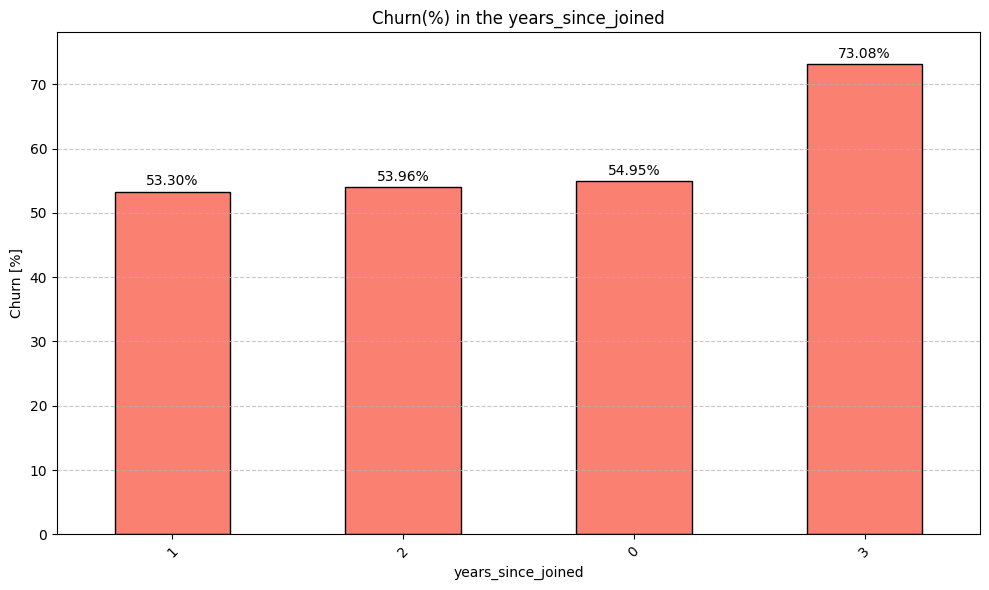

In [ ]:
def churn_to_col(date):
  churn_by_date = df.groupby(date)['churn_risk_score'].mean().sort_values()

  churn_percent = churn_by_date * 100

  plt.figure(figsize=(10, 6))
  churn_percent.plot(kind='bar', color='salmon', edgecolor='black')

  plt.title('Churn(%) in the ' + date)
  plt.xlabel(date)
  plt.ylabel('Churn [%]')
  plt.xticks(rotation=45)
  plt.ylim(0, churn_percent.max() + 5)

  for i, v in enumerate(churn_percent):
      plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom')

  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

churn_to_col('years_since_joined')

Checking difference in quarter of joining.

In [ ]:
df['join_week'] = df['joining_date'].dt.isocalendar().week
df['join_quarter'] = df['joining_date'].dt.quarter
df['join_quarter'].value_counts()

join_quarter
3    9321
4    9242
2    9141
1    9000
Name: count, dtype: int64

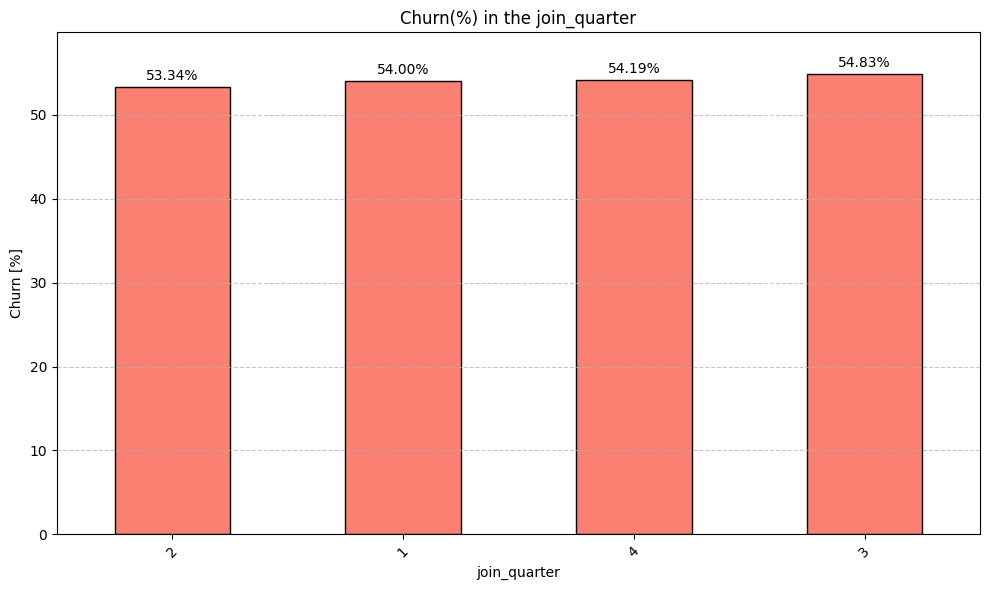

In [ ]:
churn_to_col('join_quarter')

Checking difference in day of the week of joining.

In [ ]:
df['join_weekday'] = df['joining_date'].dt.dayofweek  # pon=0, ndz=6
df['join_weekday_name'] = df['joining_date'].dt.day_name()
df['join_weekday_name'].value_counts()

join_weekday_name
Friday       5389
Sunday       5258
Thursday     5256
Tuesday      5253
Monday       5249
Saturday     5171
Wednesday    5128
Name: count, dtype: int64

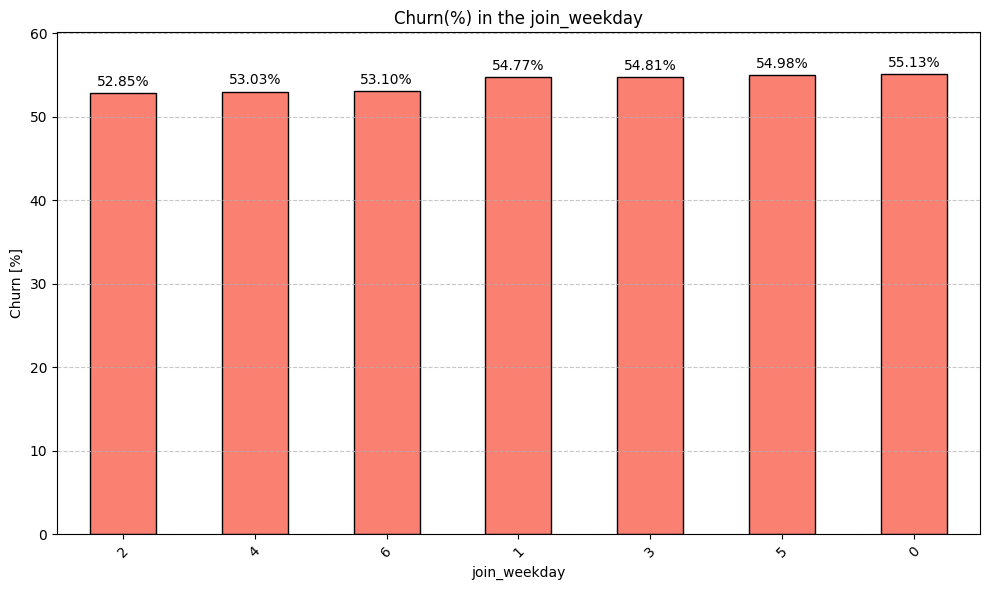

In [ ]:
churn_to_col('join_weekday')

We see that, is no a difference on quartile/day of joining, but is difference in years_since_joined

In [ ]:
df.drop(columns=['joining_date', 'join_weekday', 'join_quarter', 'days_since_joined','join_week', 'join_weekday_name'], inplace=True)

In [ ]:
numerical_features = numerical_features.union(pd.Index(['years_since_joined']))
numerical_features

Index(['age', 'avg_frequency_login_days', 'avg_time_spent',
       'avg_transaction_value', 'days_since_last_login', 'points_in_wallet',
       'years_since_joined'],
      dtype='object')

#Processing data

Changing feedback to positive or negative.

In [ ]:
def get_category(x):
    if x in ['Poor Product Quality', 'Too many ads', 'Poor Website', 'Poor Customer Service']:
        return 'Negative'
    elif x in ['Reasonable Price', 'User Friendly Website', 'Products always in Stock']:
        return 'Positive'
    else:
        return 'Other'

df['feedback_positive'] = df['feedback'].apply(get_category)
df['feedback_positive'].value_counts()

feedback_positive
Negative    24955
Other        7588
Positive     4161
Name: count, dtype: int64

In [ ]:
df.drop(columns=['feedback'], inplace=True)

In [ ]:
categorical_features = categorical_features.append(pd.Index(['feedback_positive']))
categorical_features = categorical_features.drop('feedback')

Checking columns: complaint_status, past_complaint

In [ ]:
df[['complaint_status', 'past_complaint']].head()

complaint_status past_complaint
0       Not Applicable             No
1               Solved            Yes
2  Solved in Follow-up            Yes
3             Unsolved            Yes
4               Solved            Yes

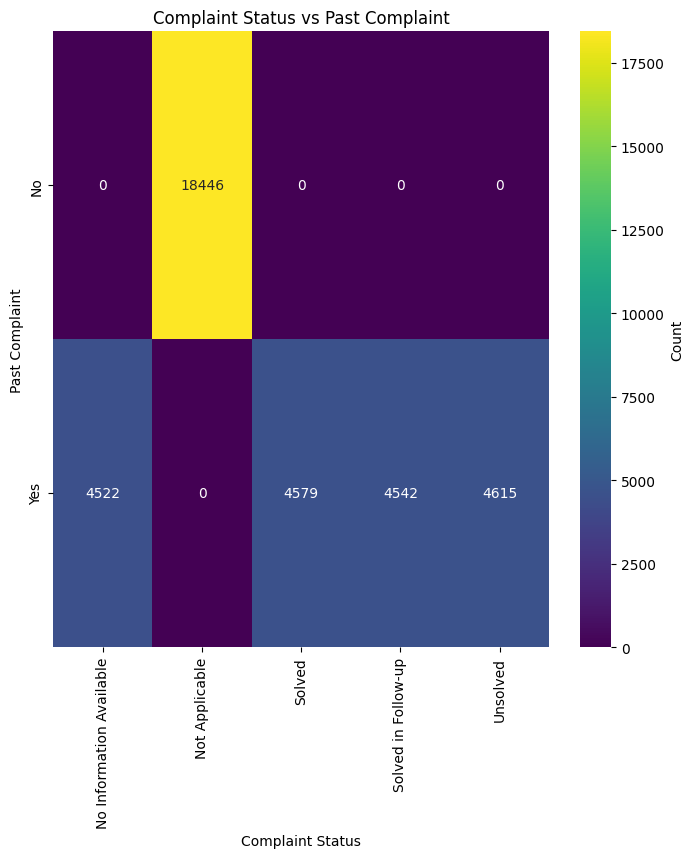

In [ ]:
plt.figure(figsize=(8, 8))

df_dhist = df.pivot_table(
    index='past_complaint',
    columns='complaint_status',
    aggfunc='size',
    fill_value=0
)

sns.heatmap(df_dhist, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Count'})

plt.xlabel('Complaint Status')
plt.ylabel('Past Complaint')
plt.title('Complaint Status vs Past Complaint')

plt.show()

This chart shows that all Resolved and Unresolved data fall into the YES category, which makes sense since a complaint was filed (complaint_status). On the other hand, data in the NO category belong to the Other group, meaning that no complaint was filed or such information is unavailable.

Based on this, we can conclude that the past_complaint column can be removed.

In [ ]:
df.drop(columns=['past_complaint'], inplace=True)

In [ ]:
categorical_features = categorical_features.drop('past_complaint')

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

age gender region_category  membership_category joined_through_referral  \
0   18      F         Village  Platinum Membership                      No   
1   32      F            City   Premium Membership                   Other   
2   44      F            Town        No Membership                     Yes   
3   37      M            City        No Membership                     Yes   
4   31      F            City        No Membership                      No   

      preferred_offer_types medium_of_operation internet_option  \
0     Gift Vouchers/Coupons               Other           Wi-Fi   
1     Gift Vouchers/Coupons             Desktop     Mobile_Data   
2     Gift Vouchers/Coupons             Desktop           Wi-Fi   
3     Gift Vouchers/Coupons             Desktop     Mobile_Data   
4  Credit/Debit Card Offers          Smartphone     Mobile_Data   

   days_since_last_login  avg_time_spent  avg_transaction_value  \
0                     17          300.63               53005.25   
1                     16          306.34               12838.38   
2                     14          516.16               21027.00   
3                     11           53.27               25239.56   
4                     20          113.13               24483.66   

   avg_frequency_login_days  points_in_wallet used_special_discount  \
0                      17.0           781.750                   Yes   
1                      10.0           697.665                   Yes   
2                      22.0           500.690                    No   
3                       6.0           567.660                    No   
4                      16.0           663.060                    No   

  offer_application_preference     complaint_status  churn_risk_score  \
0                          Yes       Not Applicable                 0   
1                           No               Solved                 0   
2                          Yes  Solved in Follow-up                 1   
3                          Yes             Unsolved                 1   
4                          Yes               Solved                 1   

   years_since_joined feedback_positive  
0                   0          Positive  
1                   0             Other  
2                   1          Negative  
3                   1          Negative  
4                   0          Negative

**Bounding Age**

Based on the chart into 4 groups

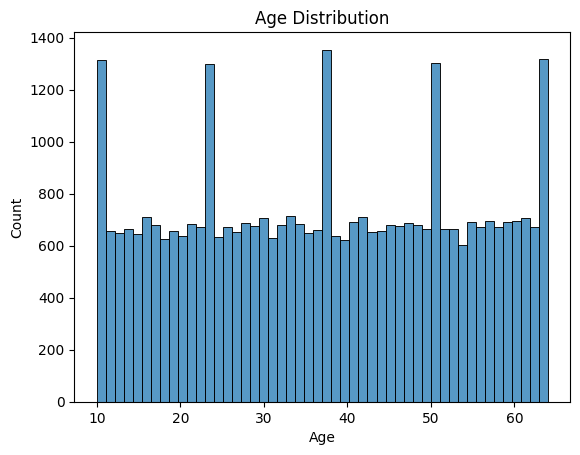

In [ ]:
sns.histplot(data=df, x='age', bins=50)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
age_quartiles = df['age'].quantile([0.25, 0.5, 0.75])
age_quartiles

0.25    23.0
0.50    37.0
0.75    51.0
Name: age, dtype: float64

In [ ]:
def bound_age(age):
  if age<23:
    return 'Youth'
  elif age<37:
    return 'Adult'
  elif age<51:
    return 'Middle-aged'
  else:
    return 'Senior'

df['age_bound'] = df['age'].apply(bound_age)
df['age_bound'].value_counts()

age_bound
Senior         9408
Middle-aged    9363
Adult          9339
Youth          8594
Name: count, dtype: int64

Bounding based on histogram and quartilies

In [ ]:
df.drop(columns=['age'], inplace=True)

In [ ]:
numerical_features = numerical_features.drop('age')

Checking sense of groups with **Kruskal Wallis**

In [ ]:
senior_chunk_risk_score = df[df['age_bound'] == 'Senior']['churn_risk_score']
middle_aged_chunk_risk_score = df[df['age_bound'] == 'Middle-aged']['churn_risk_score']
adult_chunk_risk_score = df[df['age_bound'] == 'Adult']['churn_risk_score']
youth_chunk_risk_score = df[df['age_bound'] == 'Youth']['churn_risk_score']

stat, p_value = stats.kruskal(senior_chunk_risk_score, middle_aged_chunk_risk_score, adult_chunk_risk_score, youth_chunk_risk_score)

print("Kruskal-Wallis H-statistic:", stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

Kruskal-Wallis H-statistic: 5.760508296669719
P-value: 0.12386150077672874
The difference is not statistically significant.


More than 1 group so I did correction with Bonferroni Test

In [ ]:
senior = df[df['age_bound'] == 'Senior']['churn_risk_score']
middle_aged = df[df['age_bound'] == 'Middle-aged']['churn_risk_score']
adult = df[df['age_bound'] == 'Adult']['churn_risk_score']
youth = df[df['age_bound'] == 'Youth']['churn_risk_score']

group_names = ['Senior', 'Middle-aged', 'Adult', 'Youth']
group_data = [senior, middle_aged, adult, youth]

group_pairs = list(combinations(range(len(group_data)), 2))

p_values = []
pair_names = []
for idx1, idx2 in group_pairs:
    g1_data = group_data[idx1]
    g2_data = group_data[idx2]
    g1_name = group_names[idx1]
    g2_name = group_names[idx2]

    stat, p = stats.mannwhitneyu(g1_data, g2_data, alternative='two-sided')
    p_values.append(p)
    pair_names.append(f"{g1_name} vs {g2_name}")

reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='bonferroni')

print("Comparison results:")
for pair, p_orig, p_corr, rej in zip(pair_names, p_values, pvals_corrected, reject):
    print(f"{pair}: original p = {p_orig:.4f}, corrected p = {p_corr:.4f}", end=' ')
    if rej:
        print("The difference is statistically significant.")
    else:
        print("The difference is not statistically significant.")


Comparison results:
Senior vs Middle-aged: original p = 0.5135, corrected p = 1.0000 The difference is not statistically significant.
Senior vs Adult: original p = 0.6847, corrected p = 1.0000 The difference is not statistically significant.
Senior vs Youth: original p = 0.0635, corrected p = 0.3807 The difference is not statistically significant.
Middle-aged vs Adult: original p = 0.2902, corrected p = 1.0000 The difference is not statistically significant.
Middle-aged vs Youth: original p = 0.2242, corrected p = 1.0000 The difference is not statistically significant.
Adult vs Youth: original p = 0.0245, corrected p = 0.1469 The difference is not statistically significant.


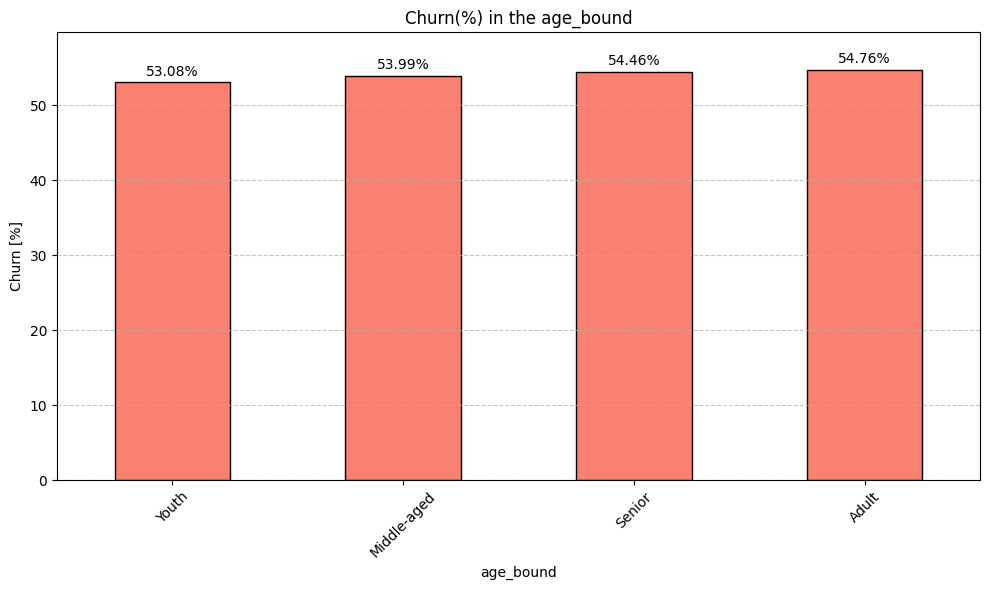

In [ ]:
churn_to_col('age_bound')

Age bound not statistically significant.

In [ ]:
df.drop(columns=['age_bound'], inplace=True)

Rounding data to 2 decimal places

In [ ]:
df[['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']] = df[['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']].round(2)

In [ ]:
df.head()

gender region_category  membership_category joined_through_referral  \
0      F         Village  Platinum Membership                      No   
1      F            City   Premium Membership                   Other   
2      F            Town        No Membership                     Yes   
3      M            City        No Membership                     Yes   
4      F            City        No Membership                      No   

      preferred_offer_types medium_of_operation internet_option  \
0     Gift Vouchers/Coupons               Other           Wi-Fi   
1     Gift Vouchers/Coupons             Desktop     Mobile_Data   
2     Gift Vouchers/Coupons             Desktop           Wi-Fi   
3     Gift Vouchers/Coupons             Desktop     Mobile_Data   
4  Credit/Debit Card Offers          Smartphone     Mobile_Data   

   days_since_last_login  avg_time_spent  avg_transaction_value  \
0                     17          300.63               53005.25   
1                     16          306.34               12838.38   
2                     14          516.16               21027.00   
3                     11           53.27               25239.56   
4                     20          113.13               24483.66   

   avg_frequency_login_days  points_in_wallet used_special_discount  \
0                      17.0            781.75                   Yes   
1                      10.0            697.66                   Yes   
2                      22.0            500.69                    No   
3                       6.0            567.66                    No   
4                      16.0            663.06                    No   

  offer_application_preference     complaint_status  churn_risk_score  \
0                          Yes       Not Applicable                 0   
1                           No               Solved                 0   
2                          Yes  Solved in Follow-up                 1   
3                          Yes             Unsolved                 1   
4                          Yes               Solved                 1   

   years_since_joined feedback_positive  
0                   0          Positive  
1                   0             Other  
2                   1          Negative  
3                   1          Negative  
4                   0          Negative

#Selecting variables for the model

##Categorical data

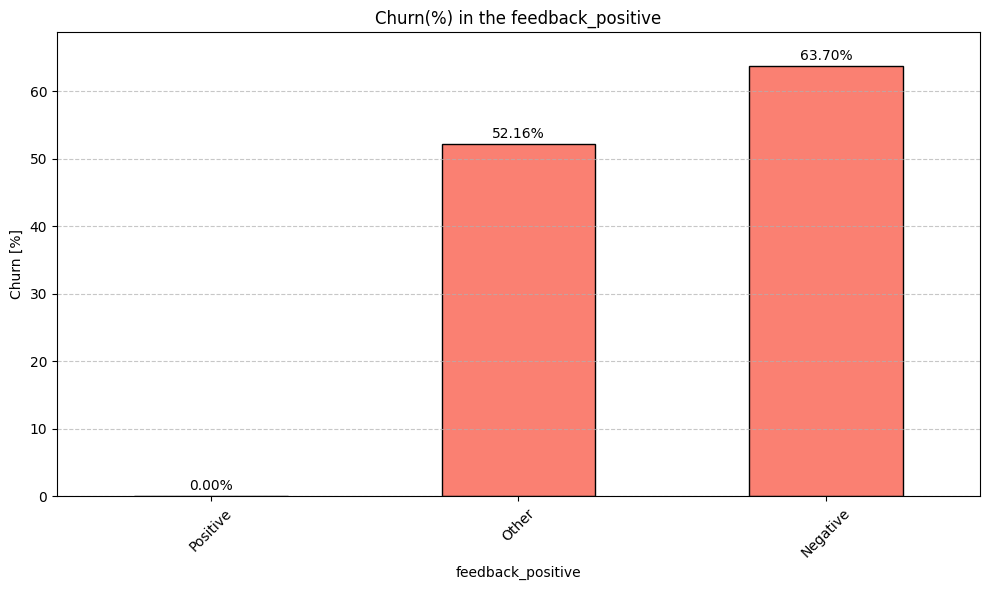

In [ ]:
churn_to_col('feedback_positive')

In [ ]:
df['feedback_positive'].value_counts()

feedback_positive
Negative    24955
Other        7588
Positive     4161
Name: count, dtype: int64

##Numerical Data

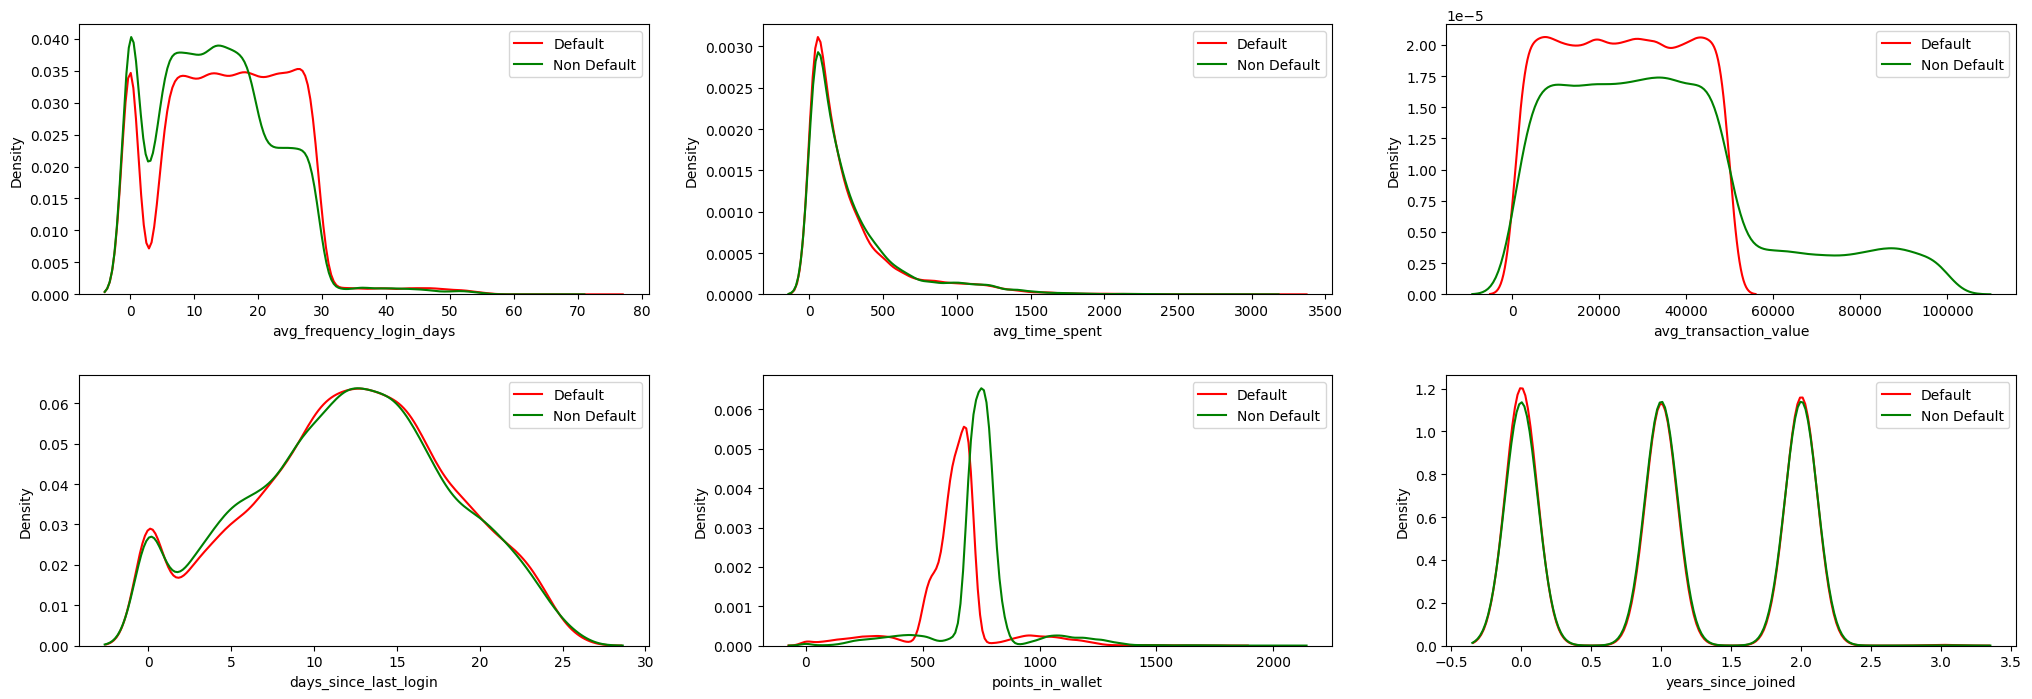

In [ ]:
fig = plt.figure(figsize=(25, 40))
for i, cecha in enumerate(numerical_features):
    ax = fig.add_subplot(9, 3, i+1)
    sns.kdeplot(df.loc[df["churn_risk_score"] == 1, cecha], ax=ax, color="red", label="Default", fill=False)
    sns.kdeplot(df.loc[df["churn_risk_score"] == 0, cecha], ax=ax, color="green", label="Non Default", fill=False)
    plt.legend()

plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()


Avg_time_spent, days_since_last_login Probably no difference to model

##Coreration chart

V kramer - kategoryczna+kategoryczna, chi(kwadrat)=kategoryczna+kategoryczna
Biserial - numeryczna + binarna

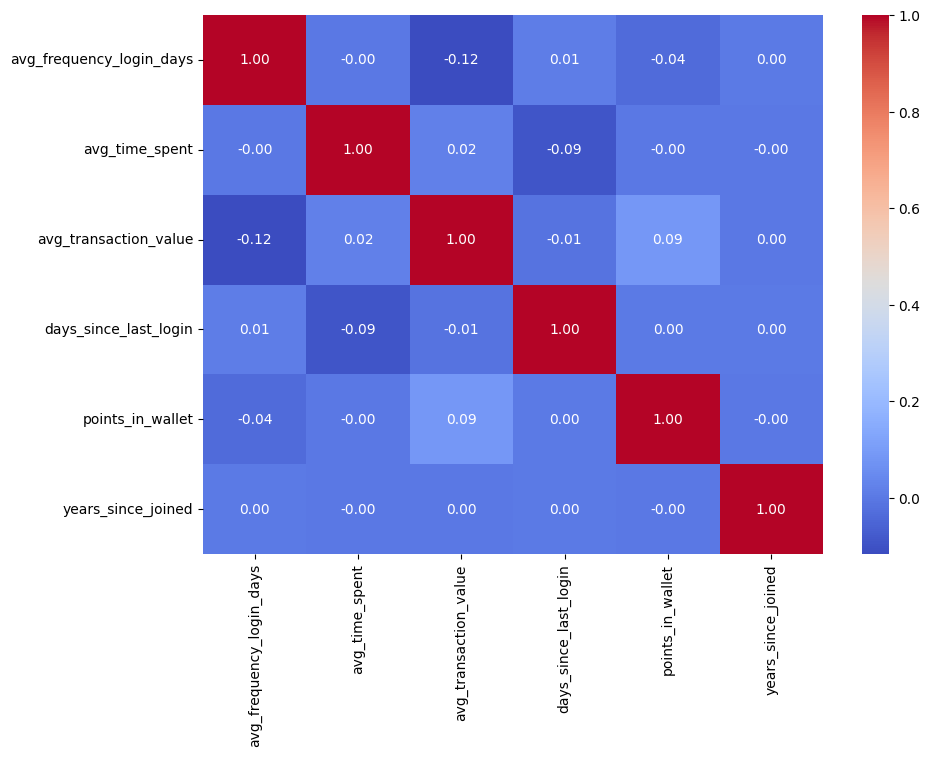

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Correlation: categorical + categorical Variable - V-kramer, chi_2

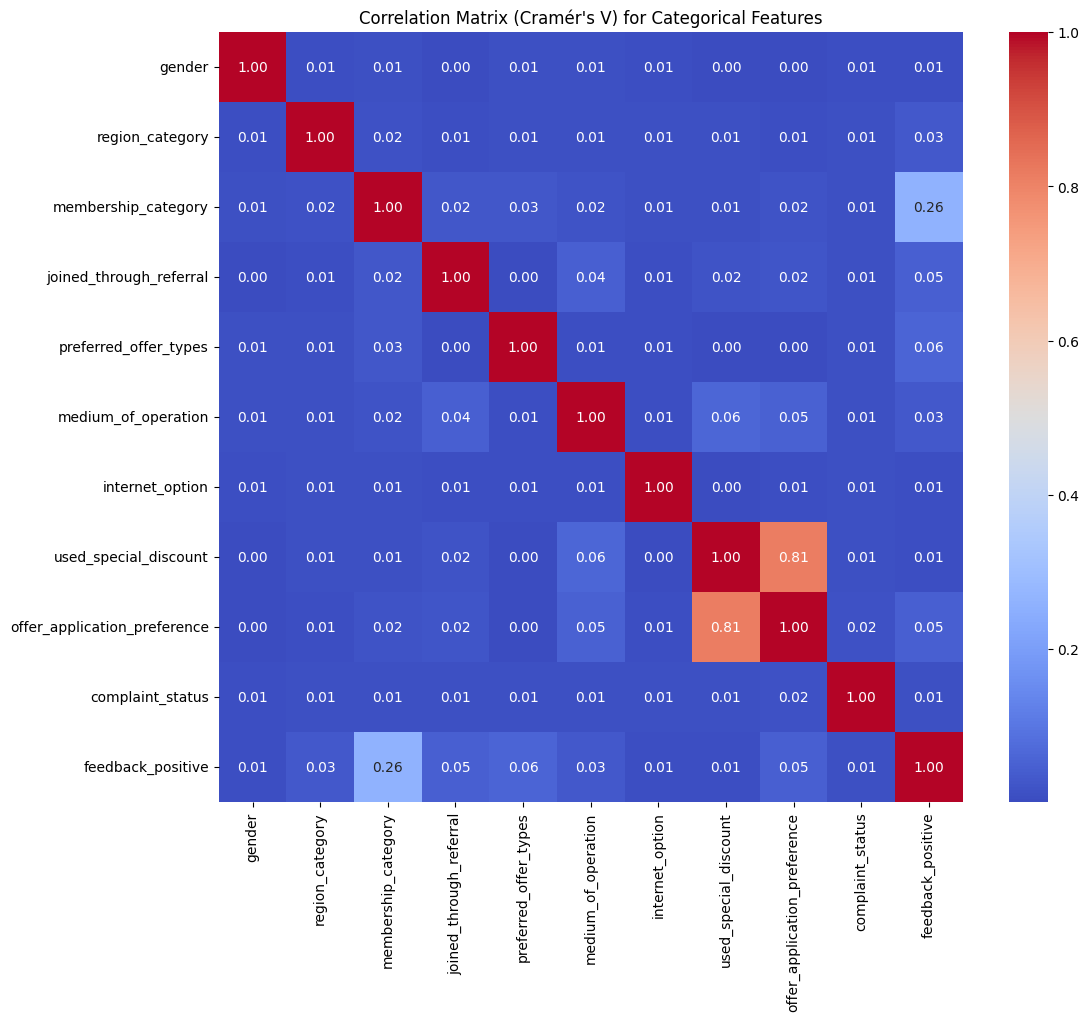

In [ ]:
def cramers_v(x, y):
    """
    Calculates Cramér's V, a measure of association between two nominal variables.
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2max = min((k - 1), (r - 1))
    return np.sqrt(phi2 / phi2max)

categorical_corr = pd.DataFrame(index=categorical_features, columns=categorical_features)
for col1, col2 in itertools.combinations_with_replacement(categorical_features, 2):
    corr = cramers_v(df[col1], df[col2])
    categorical_corr.loc[col1, col2] = corr
    categorical_corr.loc[col2, col1] = corr

plt.figure(figsize=(12, 10))
sns.heatmap(categorical_corr.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Cramér's V) for Categorical Features")
plt.show()

In [ ]:
df[['used_special_discount', 'offer_application_preference']]

used_special_discount offer_application_preference
0                       Yes                          Yes
1                       Yes                           No
2                        No                          Yes
3                        No                          Yes
4                        No                          Yes
...                     ...                          ...
36987                    No                          Yes
36988                   Yes                           No
36989                    No                          Yes
36990                   Yes                          Yes
36991                   Yes                           No

[36704 rows x 2 columns]

In [ ]:
df['used_special_discount_offer_application_preference'] = df['used_special_discount'] + df['offer_application_preference']

In [ ]:
df['used_special_discount_offer_application_preference']

0        YesYes
1         YesNo
2         NoYes
3         NoYes
4         NoYes
          ...  
36987     NoYes
36988     YesNo
36989     NoYes
36990    YesYes
36991     YesNo
Name: used_special_discount_offer_application_preference, Length: 36704, dtype: object

In [ ]:
categorical_features = categorical_features.drop(['used_special_discount','offer_application_preference'])
categorical_features = categorical_features.append(pd.Index(['used_special_discount_offer_application_preference']))

In [ ]:
df.drop(columns=['used_special_discount', 'offer_application_preference'], inplace=True)

#Statistical Tests



## Checking Difference between women and men for a model

**Test T** - normalność rozkładu danych, duża grupa - tylko numeryczne!

Test nieparametryczny **Test U Manna-Whitneya (Wilcoxona)** - nie wymaga normalności, lepszy dla danych zawierających odstające wartości

In [ ]:
female_chunk_risk_score = df[df['gender'] == 'F']['churn_risk_score']
male_chunk_risk_score = df[df['gender'] == 'M']['churn_risk_score']

alpha = 0.05

stat, p_value = stats.mannwhitneyu(female_chunk_risk_score, male_chunk_risk_score)

print("U-statistic:", stat)
print("P-value:", p_value)

if p_value < alpha:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

U-statistic: 168689910.0
P-value: 0.3457270866965926
The difference is not statistically significant.


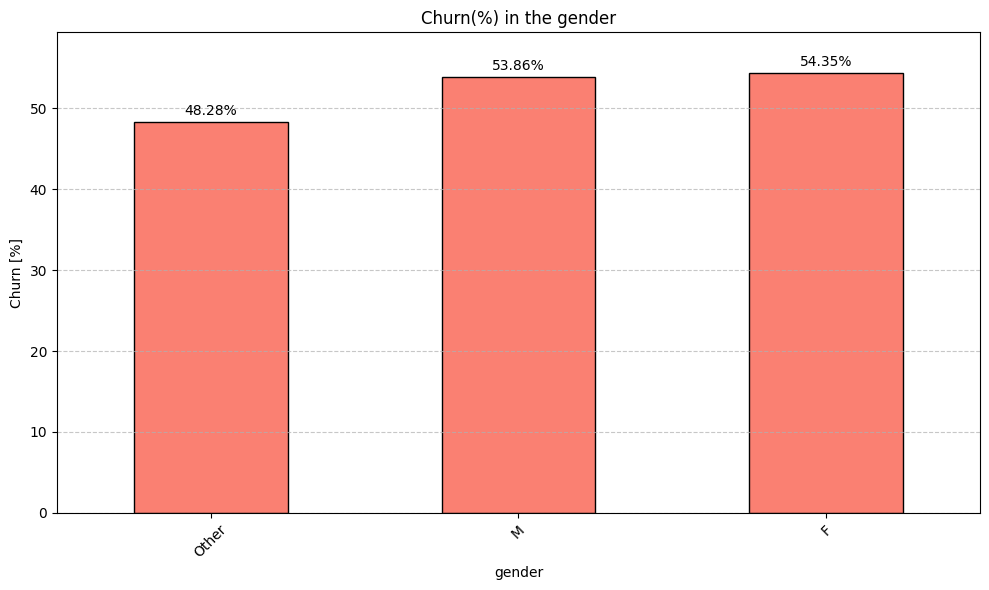

In [ ]:
churn_to_col('gender')

Deleting gender from model.

In [ ]:
df.drop('gender', axis=1, inplace=True)

In [ ]:
categorical_features = categorical_features.drop('gender')

#Processing

In [ ]:
df.head()

region_category  membership_category joined_through_referral  \
0         Village  Platinum Membership                      No   
1            City   Premium Membership                   Other   
2            Town        No Membership                     Yes   
3            City        No Membership                     Yes   
4            City        No Membership                      No   

      preferred_offer_types medium_of_operation internet_option  \
0     Gift Vouchers/Coupons               Other           Wi-Fi   
1     Gift Vouchers/Coupons             Desktop     Mobile_Data   
2     Gift Vouchers/Coupons             Desktop           Wi-Fi   
3     Gift Vouchers/Coupons             Desktop     Mobile_Data   
4  Credit/Debit Card Offers          Smartphone     Mobile_Data   

   days_since_last_login  avg_time_spent  avg_transaction_value  \
0                     17          300.63               53005.25   
1                     16          306.34               12838.38   
2                     14          516.16               21027.00   
3                     11           53.27               25239.56   
4                     20          113.13               24483.66   

   avg_frequency_login_days  points_in_wallet     complaint_status  \
0                      17.0            781.75       Not Applicable   
1                      10.0            697.66               Solved   
2                      22.0            500.69  Solved in Follow-up   
3                       6.0            567.66             Unsolved   
4                      16.0            663.06               Solved   

   churn_risk_score  years_since_joined feedback_positive  \
0                 0                   0          Positive   
1                 0                   0             Other   
2                 1                   1          Negative   
3                 1                   1          Negative   
4                 1                   0          Negative   

  used_special_discount_offer_application_preference  
0                                             YesYes  
1                                              YesNo  
2                                              NoYes  
3                                              NoYes  
4                                              NoYes

##Ordinal Encoding

In [ ]:
encoder = OrdinalEncoder()

encoded = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded, columns=categorical_features)

encoded_df

region_category  membership_category  joined_through_referral  \
0                  3.0                  3.0                      0.0   
1                  0.0                  4.0                      1.0   
2                  2.0                  2.0                      2.0   
3                  0.0                  2.0                      2.0   
4                  0.0                  2.0                      0.0   
...                ...                  ...                      ...   
36699              1.0                  0.0                      0.0   
36700              2.0                  0.0                      0.0   
36701              1.0                  0.0                      2.0   
36702              3.0                  3.0                      0.0   
36703              2.0                  5.0                      0.0   

       preferred_offer_types  medium_of_operation  internet_option  \
0                        1.0                  2.0              2.0   
1                        1.0                  1.0              1.0   
2                        1.0                  1.0              2.0   
3                        1.0                  1.0              1.0   
4                        0.0                  3.0              1.0   
...                      ...                  ...              ...   
36699                    0.0                  1.0              2.0   
36700                    2.0                  3.0              2.0   
36701                    1.0                  1.0              2.0   
36702                    1.0                  3.0              1.0   
36703                    1.0                  1.0              1.0   

       complaint_status  feedback_positive  \
0                   1.0                2.0   
1                   2.0                1.0   
2                   3.0                0.0   
3                   4.0                0.0   
4                   2.0                0.0   
...                 ...                ...   
36699               0.0                1.0   
36700               1.0                0.0   
36701               4.0                0.0   
36702               1.0                1.0   
36703               1.0                1.0   

       used_special_discount_offer_application_preference  
0                                                    2.0   
1                                                    1.0   
2                                                    0.0   
3                                                    0.0   
4                                                    0.0   
...                                                  ...   
36699                                                0.0   
36700                                                1.0   
36701                                                0.0   
36702                                                2.0   
36703                                                1.0   

[36704 rows x 9 columns]

Resetting the index to properly join datasets.

In [ ]:
encoded_df = encoded_df.reset_index(drop=True)
df_subset = df[numerical_features.tolist() + ['churn_risk_score']].reset_index(drop=True)

preprocessed_df = encoded_df.join(df_subset)
preprocessed_df

region_category  membership_category  joined_through_referral  \
0                  3.0                  3.0                      0.0   
1                  0.0                  4.0                      1.0   
2                  2.0                  2.0                      2.0   
3                  0.0                  2.0                      2.0   
4                  0.0                  2.0                      0.0   
...                ...                  ...                      ...   
36699              1.0                  0.0                      0.0   
36700              2.0                  0.0                      0.0   
36701              1.0                  0.0                      2.0   
36702              3.0                  3.0                      0.0   
36703              2.0                  5.0                      0.0   

       preferred_offer_types  medium_of_operation  internet_option  \
0                        1.0                  2.0              2.0   
1                        1.0                  1.0              1.0   
2                        1.0                  1.0              2.0   
3                        1.0                  1.0              1.0   
4                        0.0                  3.0              1.0   
...                      ...                  ...              ...   
36699                    0.0                  1.0              2.0   
36700                    2.0                  3.0              2.0   
36701                    1.0                  1.0              2.0   
36702                    1.0                  3.0              1.0   
36703                    1.0                  1.0              1.0   

       complaint_status  feedback_positive  \
0                   1.0                2.0   
1                   2.0                1.0   
2                   3.0                0.0   
3                   4.0                0.0   
4                   2.0                0.0   
...                 ...                ...   
36699               0.0                1.0   
36700               1.0                0.0   
36701               4.0                0.0   
36702               1.0                1.0   
36703               1.0                1.0   

       used_special_discount_offer_application_preference  \
0                                                    2.0    
1                                                    1.0    
2                                                    0.0    
3                                                    0.0    
4                                                    0.0    
...                                                  ...    
36699                                                0.0    
36700                                                1.0    
36701                                                0.0    
36702                                                2.0    
36703                                                1.0    

       avg_frequency_login_days  avg_time_spent  avg_transaction_value  \
0                          17.0          300.63               53005.25   
1                          10.0          306.34               12838.38   
2                          22.0          516.16               21027.00   
3                           6.0           53.27               25239.56   
4                          16.0          113.13               24483.66   
...                         ...             ...                    ...   
36699                       6.0            0.00               27277.68   
36700                      28.0            0.00               11069.71   
36701                       0.0          154.94               38127.56   
36702                      20.0          482.61                2378.86   
36703                       0.0           79.18                2189.68   

       days_since_last_login  points_in_wallet  years_since_joined  \
0                         17            781.75          

In [ ]:
preprocessed_df.shape

(36704, 16)

In [ ]:
preprocessed_df.isna().sum()

region_category                                       0
membership_category                                   0
joined_through_referral                               0
preferred_offer_types                                 0
medium_of_operation                                   0
internet_option                                       0
complaint_status                                      0
feedback_positive                                     0
used_special_discount_offer_application_preference    0
avg_frequency_login_days                              0
avg_time_spent                                        0
avg_transaction_value                                 0
days_since_last_login                                 0
points_in_wallet                                      0
years_since_joined                                    0
churn_risk_score                                      0
dtype: int64

In [ ]:
preprocessed_df.dropna(inplace=True)

#Dividing data

In [ ]:
X = preprocessed_df.drop('churn_risk_score', axis=1)
y = preprocessed_df['churn_risk_score']

In [ ]:
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.8, random_state=42)
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42)

##Models

##Checking on not Scaled Data

In [ ]:
def train_and_evaluate_model(X_train, y_train, X_test, y_test, models):
    results = {
        "model_name": [],
        "accuracy_train": [],
        "accuracy_test": [],
        "f1_train": [],
        "f1_test": [],
        "auc_train": [],
        "auc_test": [],
        "precision": [],
        "recall": [],
        "true_positive": [],
        "false_positive": [],
        "false_negative": []
    }
    for name, model in models.items():

        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        results["model_name"].append(name)
        results["accuracy_train"].append(accuracy_score(y_train, y_train_pred))
        results["accuracy_test"].append(accuracy_score(y_test, y_test_pred))
        results["f1_train"].append(f1_score(y_train, y_train_pred, average='binary'))
        results["f1_test"].append(f1_score(y_test, y_test_pred, average='binary'))

        y_train_prob = model.predict_proba(X_train)[:, 1]
        y_test_prob = model.predict_proba(X_test)[:, 1]
        results["auc_train"].append(roc_auc_score(y_train, y_train_prob))
        results["auc_test"].append(roc_auc_score(y_test, y_test_prob))

        tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
        results["true_positive"].append(tp)
        results["false_positive"].append(fp)
        results["false_negative"].append(fn)

        results["precision"].append(precision_score(y_test, y_test_pred))
        results["recall"].append(recall_score(y_test, y_test_pred))

    results_df = pd.DataFrame(results)
    return results_df

In [ ]:
models = {
     "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=42, verbose=0)
}

In [ ]:
train_and_evaluate_model(X_train_sample, y_train_sample, X_test_sample, y_test_sample, models)

model_name  accuracy_train  accuracy_test  f1_train   f1_test  auc_train  \
0  RandomForest        1.000000       0.926431  1.000000  0.933333   1.000000   
1       XGBoost        0.973433       0.934605  0.975533  0.940447   0.996283   
2      CatBoost        0.941247       0.929837  0.945746  0.935423   0.983357   

   auc_test  precision    recall  true_positive  false_positive  \
0  0.973937   0.924205  0.942643            756              62   
1  0.980744   0.935802  0.945137            758              52   
2  0.977961   0.940731  0.930175            746              47   

   false_negative  
0              46  
1              44  
2              56

##Chosing XGBoost - Hyperparameters



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Optuna albo HyperOpt

model + kazda siatka + wyniki

In [ ]:
param_distributions = {
    'n_estimators': [i for i in range(100,1000,100)],
    'learning_rate': list(np.arange(0.01, 0.11, 0.01)),  # from 0.01 to 0.1
    'max_depth': [3,5,7,9,11,15],
    'subsample': list(np.arange(0.5,1,0.1)),
    'colsample_bytree': list(np.arange(0.5,1,0.1))
}

xgb_model = xgb.XGBClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best ROC AUC Score:", random_search.best_score_)


best_gb_model = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.8999999999999999, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.03, 'colsample_bytree': 0.8999999999999999}
Best ROC AUC Score: 0.9757094259735493


In [ ]:
joblib.dump(xgb_model, 'drive/MyDrive/random_search_XGBoost_model_07_05_2025.joblib')

['drive/MyDrive/random_search_XGBoost_model_07_05_2025.joblib']

In [ ]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.11, step=0.01),
        'max_depth': trial.suggest_int('max_depth', 3, 15, step =2),
        'subsample': trial.suggest_float('subsample', 0.5, 1, step=0.1),
        'colsample_bytree': trial.suggest_float('colsample_bytree',0.5, 1, step=0.1),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    model = xgb.XGBClassifier(**params)
    cv = StratifiedKFold(n_splits=5)
    auc = cross_val_score(model, X_train, y_train, scoring="roc_auc", cv=cv, n_jobs=-1)
    return auc.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best hyperparameters:", study.best_params)
print("Best ROC AUC:", study.best_value)

best_model = xgb.XGBClassifier(**study.best_params)
best_model.fit(X_train, y_train)

[I 2025-05-06 23:29:19,632] A new study created in memory with name: no-name-ac2fbeaf-207b-411d-a347-3b68d700eb0e
[I 2025-05-06 23:29:32,494] Trial 0 finished with value: 0.9748734434608204 and parameters: {'n_estimators': 200, 'learning_rate': 0.09999999999999999, 'max_depth': 11, 'subsample': 0.8, 'colsample_bytree': 0.9}. Best is trial 0 with value: 0.9748734434608204.
[I 2025-05-06 23:29:41,666] Trial 1 finished with value: 0.9749386136927434 and parameters: {'n_estimators': 900, 'learning_rate': 0.09999999999999999, 'max_depth': 3, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 1 with value: 0.9749386136927434.
[I 2025-05-06 23:30:01,396] Trial 2 finished with value: 0.975320456117983 and parameters: {'n_estimators': 800, 'learning_rate': 0.02, 'max_depth': 9, 'subsample': 0.6, 'colsample_bytree': 0.8}. Best is trial 2 with value: 0.975320456117983.
[I 2025-05-06 23:30:10,881] Trial 3 finished with value: 0.9749938085397037 and parameters: {'n_estimators': 200, 'learnin

Best hyperparameters: {'n_estimators': 100, 'learning_rate': 0.09999999999999999, 'max_depth': 7, 'subsample': 0.7, 'colsample_bytree': 0.8}
Best ROC AUC: 0.9758637169970115


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09999999999999999,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
joblib.dump(best_model, 'drive/MyDrive/random_search_XGBoost_model_Optuna_07_05_2025.joblib')

['drive/MyDrive/random_search_XGBoost_model_Optuna_07_05_2025.joblib']

In [ ]:
fig1 = vis.plot_optimization_history(study)
fig1.show()

fig2 = vis.plot_param_importances(study)
fig2.show()

##Best Model

In [ ]:
best_model = joblib.load('drive/MyDrive/random_search_XGBoost_model_Optuna_07_05_2025.joblib')

In [ ]:
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09999999999999999,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
best_model.feature_importances_

array([0.01154514, 0.44254476, 0.01241117, 0.01107376, 0.01157221,
       0.01148046, 0.01167669, 0.1355227 , 0.01133396, 0.01198529,
       0.01216213, 0.01743276, 0.01167424, 0.2755221 , 0.01206258],
      dtype=float32)

In [ ]:
importances = best_model.feature_importances_

feature_names = X_train.columns.tolist()

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

importance_df

Feature  Importance
1                                 membership_category    0.442545
13                                   points_in_wallet    0.275522
7                                   feedback_positive    0.135523
11                              avg_transaction_value    0.017433
2                             joined_through_referral    0.012411
10                                     avg_time_spent    0.012162
14                                 years_since_joined    0.012063
9                            avg_frequency_login_days    0.011985
6                                    complaint_status    0.011677
12                              days_since_last_login    0.011674
4                                 medium_of_operation    0.011572
0                                     region_category    0.011545
5                                     internet_option    0.011480
8   used_special_discount_offer_application_prefer...    0.011334
3                               preferred_offer_types    0.011074

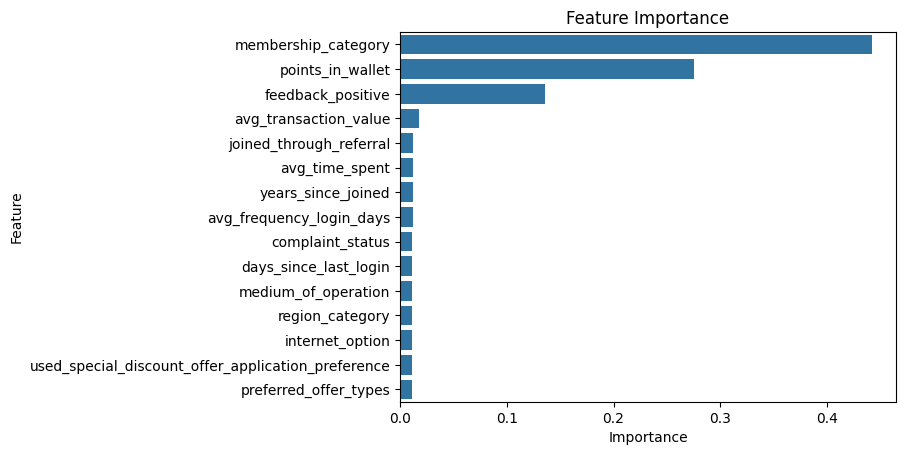

In [ ]:
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

##Results

In [ ]:
def result(model, X_train, y_train, X_test, y_test):
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  train_acc = accuracy_score(y_train, train_pred)
  test_acc = accuracy_score(y_test, test_pred)
  print(f"Training accuracy: {train_acc:.4f}")
  print(f"Test accuracy: {test_acc:.4f}")
  print(f"Difference: {train_acc - test_acc:.4f}")

  train_proba = model.predict_proba(X_train)[:, 1]
  test_proba = model.predict_proba(X_test)[:, 1]
  train_auc = roc_auc_score(y_train, train_proba)
  test_auc = roc_auc_score(y_test, test_proba)
  print(f"Training AUC: {train_auc:.4f}")
  print(f"Test AUC: {test_auc:.4f}")

In [ ]:
result(best_model, X_train, y_train, X_test, y_test)

Training accuracy: 0.9652
Test accuracy: 0.9305
Difference: 0.0347
Training AUC: 0.9934
Test AUC: 0.9743


##Shap Values

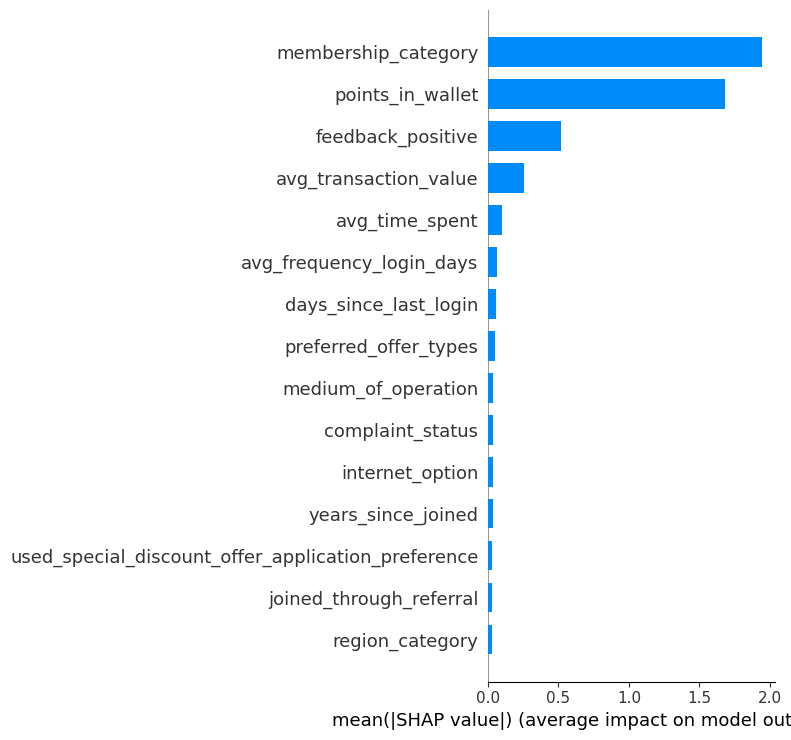

In [ ]:
shap.initjs()

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")

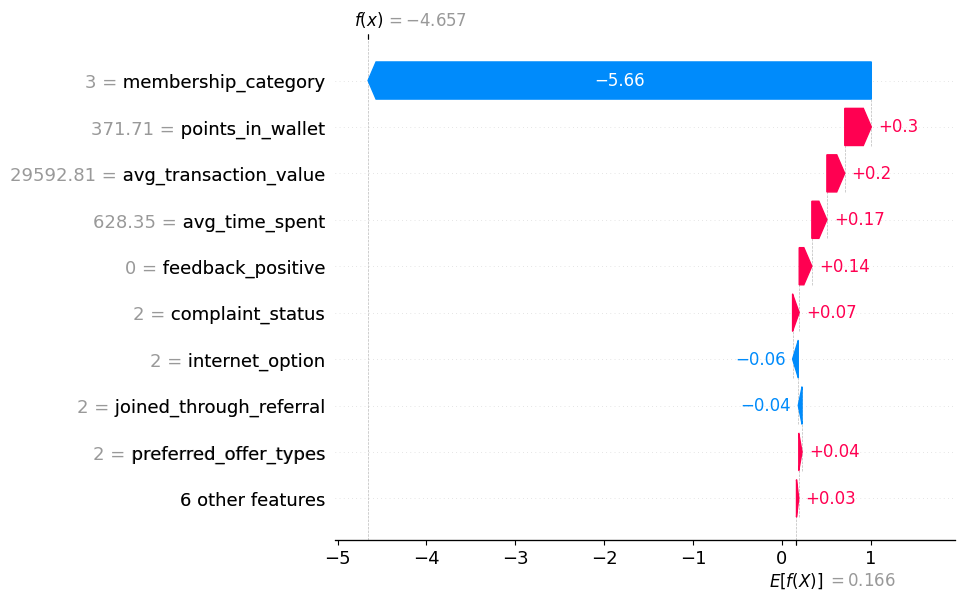

In [ ]:
explanation = shap.Explanation(values=shap_values,
                                 base_values=explainer.expected_value,
                                 data=X_test.values,
                                 feature_names=X_test.columns)

shap.plots.waterfall(explanation[0])

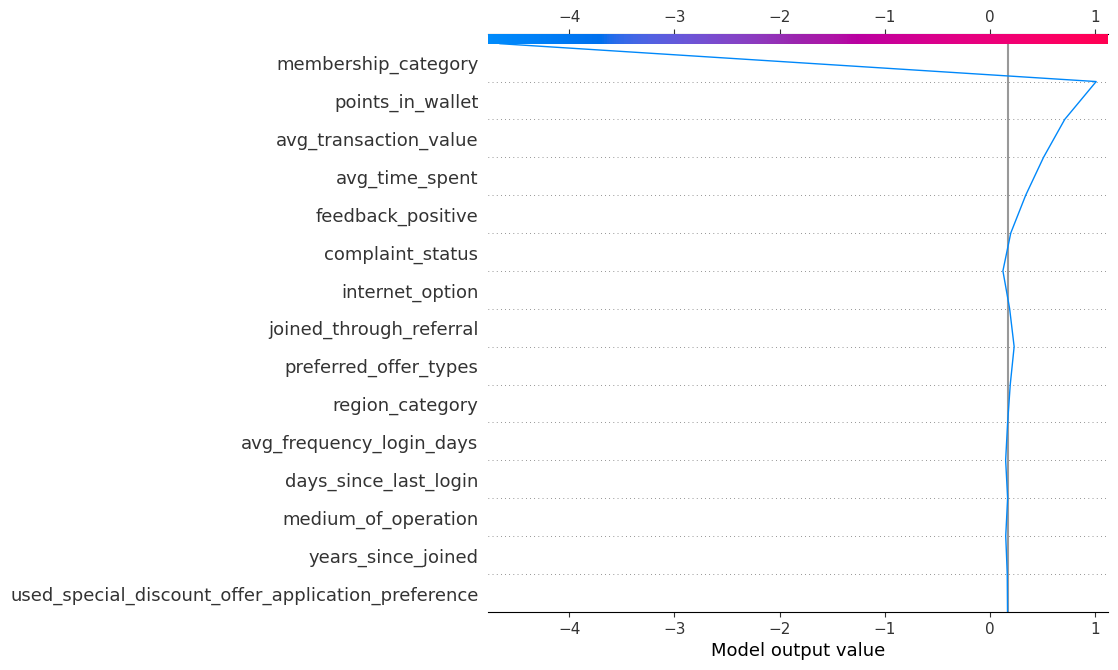

In [ ]:
shap.decision_plot(explainer.expected_value, shap_values[0], X_test.columns)

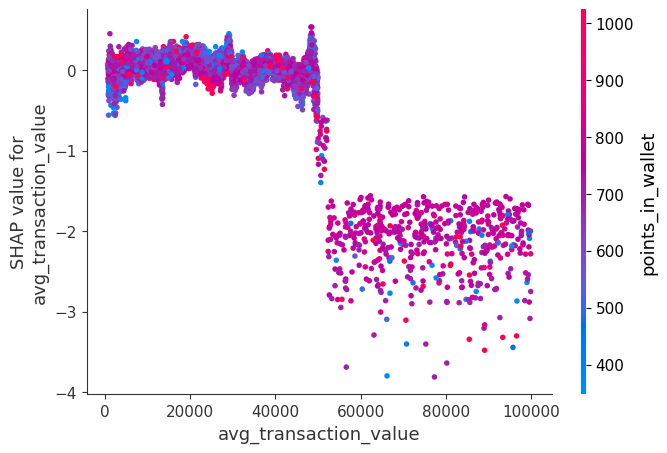

In [ ]:
shap.dependence_plot("avg_transaction_value", shap_values, X_test)

# Feature Selection





##RFE

In [ ]:
from sklearn.feature_selection import RFECV

rfe = RFECV(estimator=best_model, cv=5)
rfe.fit(X_train, y_train)

RFECV(cv=5,
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.8, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.09999999999999999, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))

In [ ]:
print("Optimal number of features: %d" % rfe.n_features_)
print("Selected features: %s" % rfe.support_)

Optimal number of features: 8
Selected features: [False  True False False False False  True  True False  True  True  True
  True  True False]


In [ ]:
len(X_train.columns)

15

In [ ]:
new_columns = X_train.columns[rfe.support_]
new_columns

Index(['membership_category', 'complaint_status', 'feedback_positive',
       'avg_frequency_login_days', 'avg_time_spent', 'avg_transaction_value',
       'days_since_last_login', 'points_in_wallet'],
      dtype='object')

In [ ]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

Training model on selected data

In [ ]:
best_model.fit(X_train_rfe, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09999999999999999,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Checking Results

In [ ]:
result(best_model, X_train_rfe, y_train, X_test_rfe, y_test)

Training accuracy: 0.9616
Test accuracy: 0.9319
Difference: 0.0297
Training AUC: 0.9921
Test AUC: 0.9746


Similar results



In [ ]:
joblib.dump(best_model, 'drive/MyDrive/random_search_XGBoost_model_after_rfe_07_05.joblib')

['drive/MyDrive/random_search_XGBoost_model_after_rfe_07_05.joblib']

##Forwards

In [ ]:
model = joblib.load('drive/MyDrive/random_search_XGBoost_model_Optuna_07_05_2025.joblib')

In [ ]:
cv = StratifiedKFold(n_splits=5)

sfs = SFS(model,
          k_features='best',
          forward=True,
          floating=False,
          scoring='roc_auc',
          cv=cv,
          n_jobs=-1,
          verbose=2)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   19.1s finished

[2025-05-07 00:03:35] Features: 1/15 -- score: 0.9332008720568087[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:   17.3s finished

[2025-05-07 00:03:52] Features: 2/15 -- score: 0.9730644541286868[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   19.5s finished

[2025-05-07 00:04:12] Features: 3/15 -- score: 0.9760066351879282[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   15.0s finished

[2025-05-07 00:04:27] Features: 4/15 -- score: 0.976345780827262[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   19.9s finished

[

Wybrane cechy: ['membership_category', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'feedback_positive', 'used_special_discount_offer_application_preference', 'avg_time_spent', 'points_in_wallet', 'years_since_joined']



[2025-05-07 00:06:25] Features: 15/15 -- score: 0.9754237729780806

In [ ]:
print("Chosen features:", list(sfs.k_feature_names_))

Chosen features: ['membership_category', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'feedback_positive', 'used_special_discount_offer_application_preference', 'avg_time_spent', 'points_in_wallet', 'years_since_joined']


In [ ]:
model.fit(X_train[[*sfs.k_feature_names_]], y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09999999999999999,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
result(model, X_train[[*sfs.k_feature_names_]], y_train, X_test[[*sfs.k_feature_names_]], y_test)

Training accuracy: 0.9579
Test accuracy: 0.9342
Difference: 0.0237
Training AUC: 0.9912
Test AUC: 0.9755


##Backwards

In [ ]:
sbs = SFS(model,
          k_features='best',
          forward=False,
          floating=False,
          scoring='roc_auc',
          cv=cv,
          n_jobs=-1,
          verbose=2)

sbs = sbs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   36.7s finished

[2025-05-07 00:11:29] Features: 14/1 -- score: 0.975755213060063[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:   38.9s finished

[2025-05-07 00:12:08] Features: 13/1 -- score: 0.9759453302295313[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   23.9s finished

[2025-05-07 00:12:32] Features: 12/1 -- score: 0.9759025397338986[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   22.9s finished

[2025-05-07 00:12:55] Features: 11/1 -- score: 0.9760813122993497[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   21.2s finished

[

In [ ]:
print("Chosen features:", list(sfs.k_feature_names_))

Chosen features: ['membership_category', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'feedback_positive', 'used_special_discount_offer_application_preference', 'avg_time_spent', 'points_in_wallet', 'years_since_joined']


In [ ]:
model.fit(X_train[[*sfs.k_feature_names_]], y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09999999999999999,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
result(model, X_train[[*sfs.k_feature_names_]], y_train, X_test[[*sfs.k_feature_names_]], y_test)

Training accuracy: 0.9579
Test accuracy: 0.9342
Difference: 0.0237
Training AUC: 0.9912
Test AUC: 0.9755


##Stepwise

In [ ]:
sfs = SFS(model,
          k_features='best',
          forward=True,
          floating=True,
          scoring='roc_auc',
          cv=5,
          n_jobs=-1,
          verbose=2)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    8.7s finished

[2025-05-07 00:14:30] Features: 1/15 -- score: 0.9332008720568087[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:   11.7s finished

[2025-05-07 00:14:42] Features: 2/15 -- score: 0.9730644541286868[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   14.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.2s finished

[2025-05-07 00:14:58] Features: 3/15 -- score: 0.9760066351879282[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   13.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent 

In [ ]:
print("Chosen features:", list(sfs.k_feature_names_))

In [ ]:
model.fit(X_train[[*sfs.k_feature_names_]], y_train)

In [ ]:
result(model, X_train[[*sfs.k_feature_names_]], y_train, X_test[[*sfs.k_feature_names_]], y_test)

##Genetic Algorithms

#Analiza wrażliwości




In [ ]:
numerical_features_after_rfe = [feature for feature in numerical_features if feature in new_columns]
numerical_features_after_rfe

['avg_frequency_login_days',
 'avg_time_spent',
 'avg_transaction_value',
 'days_since_last_login',
 'points_in_wallet']

In [ ]:
X_train_analize = X_train[numerical_features_after_rfe]
X_test_analize = X_test[numerical_features_after_rfe]

In [ ]:
best_model.fit(X_train_analize, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09999999999999999,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

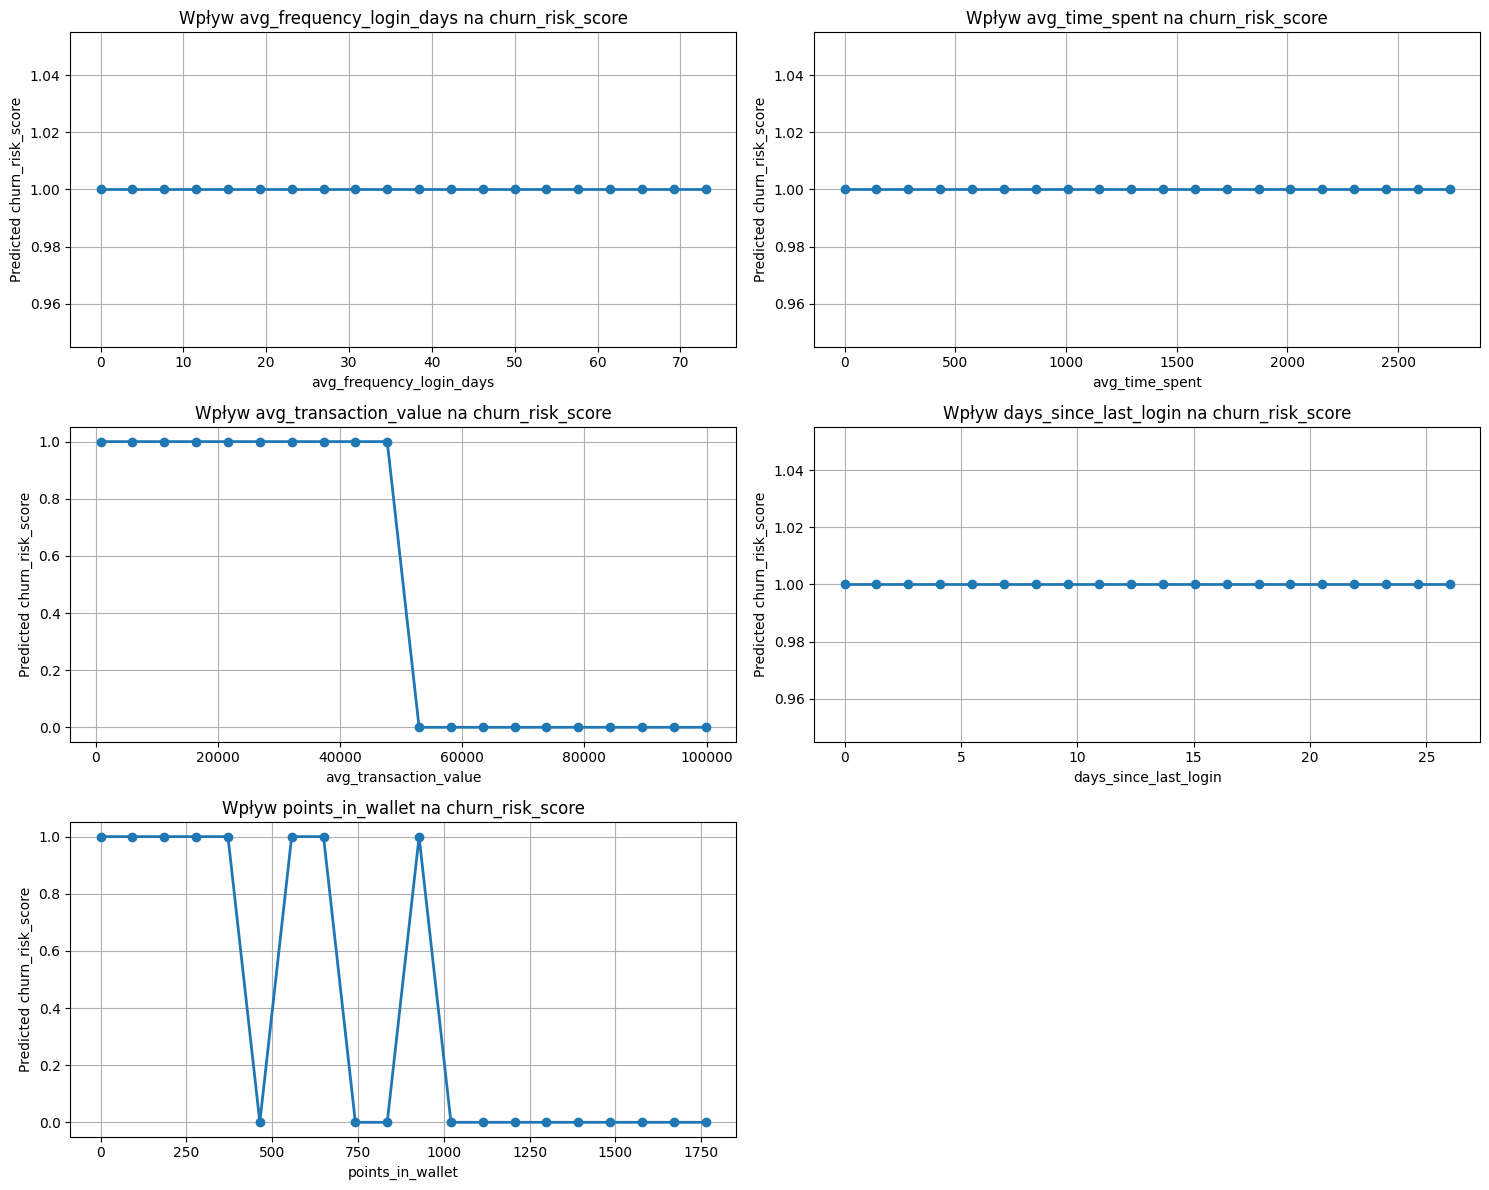

In [ ]:
def analyze_sensitivity_corrected(model, feature_name, X_data, num_points=20):
    min_val = X_data[feature_name].min()
    max_val = X_data[feature_name].max()

    feature_values = np.linspace(min_val, max_val, num_points)
    mean_predictions = []

    reference_point = pd.DataFrame({col: [X_data[col].mean()] for col in X_data.columns})

    for val in feature_values:
        test_point = reference_point.copy()
        test_point[feature_name] = val
        prediction = model.predict(test_point)[0]
        mean_predictions.append(prediction)

    return feature_values, mean_predictions

sensitivity_results = {}

for feature in numerical_features_after_rfe:
    feature_values, predictions = analyze_sensitivity_corrected(best_model, feature, X_test_analize)
    sensitivity_results[feature] = (feature_values, predictions)

for feature in numerical_features_after_rfe:
    feature_values, predictions = sensitivity_results[feature]

    results_table = pd.DataFrame({
        feature: feature_values,
        'churn_risk_score': predictions
    })

plt.figure(figsize=(15, 12))

for i, feature in enumerate(numerical_features_after_rfe):
    plt.subplot(3, 2, i+1)
    feature_values, predictions = sensitivity_results[feature]
    plt.plot(feature_values, predictions, 'o-', linewidth=2)
    plt.xlabel(feature)
    plt.ylabel('Predicted churn_risk_score')
    plt.title(f'Wpływ {feature} na churn_risk_score')
    plt.grid(True)

plt.tight_layout()
plt.show()